In [1]:
import numpy as np

# Coordinates for diamonds and dots
diamonds = np.array([
    (0, 0.5), (1.5, 0), (1, 1), (2, 1), (0.5, 2), (1.5, 2), (2.5, 2), (1, 3), (2, 3)
])
dots = np.array([
    (-1.5, 1), (-1.5, 0), (-0.5, 0.5), (-2, -1), (-1, -1), (0.5, 0.5),
    (1.5, 0.5), (0.5, -0.5), (1, -1), (1.5, -0.5)
])

# Calculate mean for diamonds and dots
mean_diamonds = np.mean(diamonds, axis=0)
mean_dots = np.mean(dots, axis=0)

# Calculate covariance matrix for diamonds and dots
cov_diamonds = np.cov(diamonds, rowvar=False)
cov_dots = np.cov(dots, rowvar=False)

mean_diamonds, mean_dots, cov_diamonds, cov_dots

(array([1.33333333, 1.61111111]),
 array([-0.15, -0.15]),
 array([[0.625     , 0.20833333],
        [0.20833333, 1.11111111]]),
 array([[1.725     , 0.00277778],
        [0.00277778, 0.55833333]]))

In [5]:
from scipy.stats import multivariate_normal

x, y = np.mgrid[-3:4:.01, -2:5:.01]
pos = np.dstack((x, y))

rv_diamonds = multivariate_normal(mean_diamonds, cov_diamonds)
rv_dots = multivariate_normal(mean_dots, cov_dots)

pdf_diamonds = rv_diamonds.pdf(pos)
pdf_dots = rv_dots.pdf(pos)
decision_boundary = np.abs(pdf_diamonds - pdf_dots)

error_probability = np.where(pdf_diamonds > pdf_dots, pdf_dots, pdf_diamonds) * 0.01 * 0.01
minimum_error_probability = np.sum(error_probability)

decision_boundary

array([[7.29460425e-04, 7.53906280e-04, 7.79031826e-04, ...,
        2.66956660e-14, 1.46812264e-14, 5.07254610e-14],
       [7.41551229e-04, 7.66402498e-04, 7.91944740e-04, ...,
        3.82847092e-14, 7.74345405e-14, 1.11286947e-13],
       [7.53798724e-04, 7.79060666e-04, 8.05025009e-04, ...,
        1.10004417e-13, 1.46637428e-13, 1.78019720e-13],
       ...,
       [5.39714296e-05, 5.57908533e-05, 5.76612736e-05, ...,
        3.95839375e-05, 3.86507979e-05, 3.77360329e-05],
       [5.26947877e-05, 5.44712043e-05, 5.62974135e-05, ...,
        3.82478526e-05, 3.73474045e-05, 3.64646544e-05],
       [5.14453191e-05, 5.31796428e-05, 5.49625806e-05, ...,
        3.69505581e-05, 3.60818061e-05, 3.52300972e-05]])

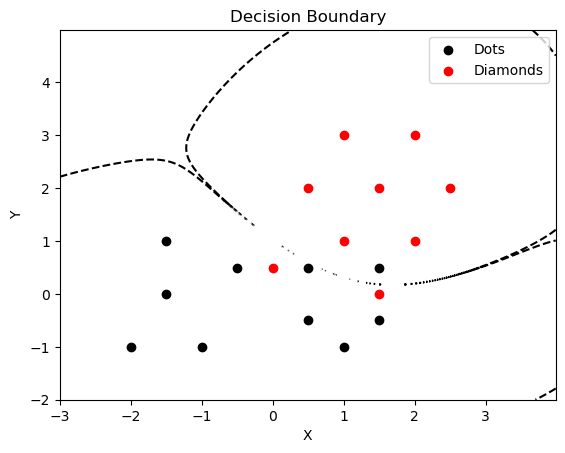

15.789473684210526

In [8]:
import matplotlib.pyplot as plt
plt.scatter(dots[:, 0], dots[:, 1], c='black', label='Dots')
plt.scatter(diamonds[:, 0], diamonds[:, 1], c='red', label='Diamonds')
plt.contour(x, y, decision_boundary, levels=[0.0001], colors='k', linestyles='--')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Boundary')
plt.legend()
plt.show()

classification_diamonds = np.argmax([rv_dots.pdf(diamonds), rv_diamonds.pdf(diamonds)], axis=0)
classification_dots = np.argmax([rv_dots.pdf(dots), rv_diamonds.pdf(dots)], axis=0)

incorrect_classifications_diamonds = np.sum(classification_diamonds == 0)
incorrect_classifications_dots = np.sum(classification_dots == 1)


total_incorrect = incorrect_classifications_diamonds + incorrect_classifications_dots

experimental_training_error = total_incorrect / (len(dots) + len(diamonds)) * 100

experimental_training_error

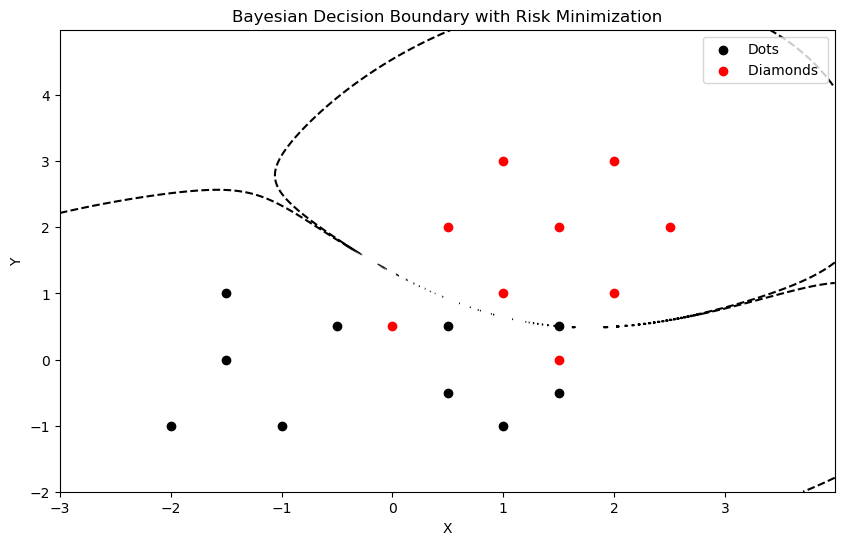

In [12]:

a = 1
prior_probability= 0.5
posterior_diamonds = pdf_diamonds * prior_probability
posterior_dots = pdf_dots * prior_probability

risk_diamonds = posterior_dots * 2 * a + posterior_diamonds * 0

risk_dots = posterior_dots * 0 + posterior_diamonds * a

risk_decision_boundary = np.abs(risk_diamonds - risk_dots)

plt.figure(figsize=(10, 6))
plt.scatter(dots[:, 0], dots[:, 1], c='black', label='Dots')
plt.scatter(diamonds[:, 0], diamonds[:, 1], c='red', label='Diamonds ')

plt.contour(x, y, risk_decision_boundary, levels=[0.0001], colors='k', linestyles='--')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bayesian Decision Boundary with Risk Minimization')
plt.legend()
plt.show()

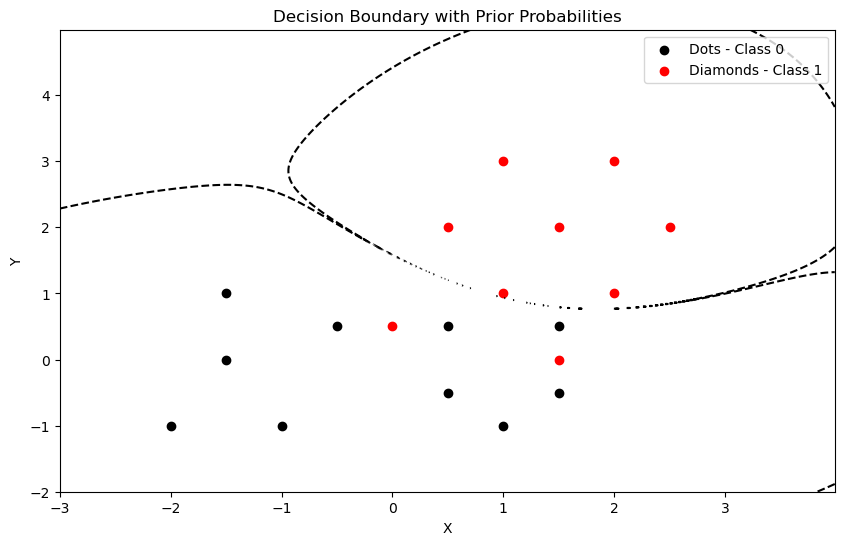

In [16]:
prior_probability_omega1 = 1/3
prior_probability_omega2 = 2/3


posterior_omega1 = pdf_diamonds * prior_probability_omega1
posterior_omega2 = pdf_dots * prior_probability_omega2

risk_omega1 = posterior_omega2 * 2 * a + posterior_omega1 * 0
risk_omega2 = posterior_omega2 * 0 + posterior_omega1 * a


risk_decision_boundary_updated = np.abs(risk_omega1 - risk_omega2)


plt.figure(figsize=(10, 6))
plt.scatter(dots[:, 0], dots[:, 1], c='black', label='Dots - Class 0')
plt.scatter(diamonds[:, 0], diamonds[:, 1], c='red', label='Diamonds - Class 1')


plt.contour(x, y, risk_decision_boundary_updated, levels=[0.0001], colors='k', linestyles='--')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Boundary with Prior Probabilities')
plt.legend()
plt.show()
